In [11]:
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread
from collections import defaultdict

In [12]:
folder_path = 'tiles/'
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png'))]
image_files.sort()

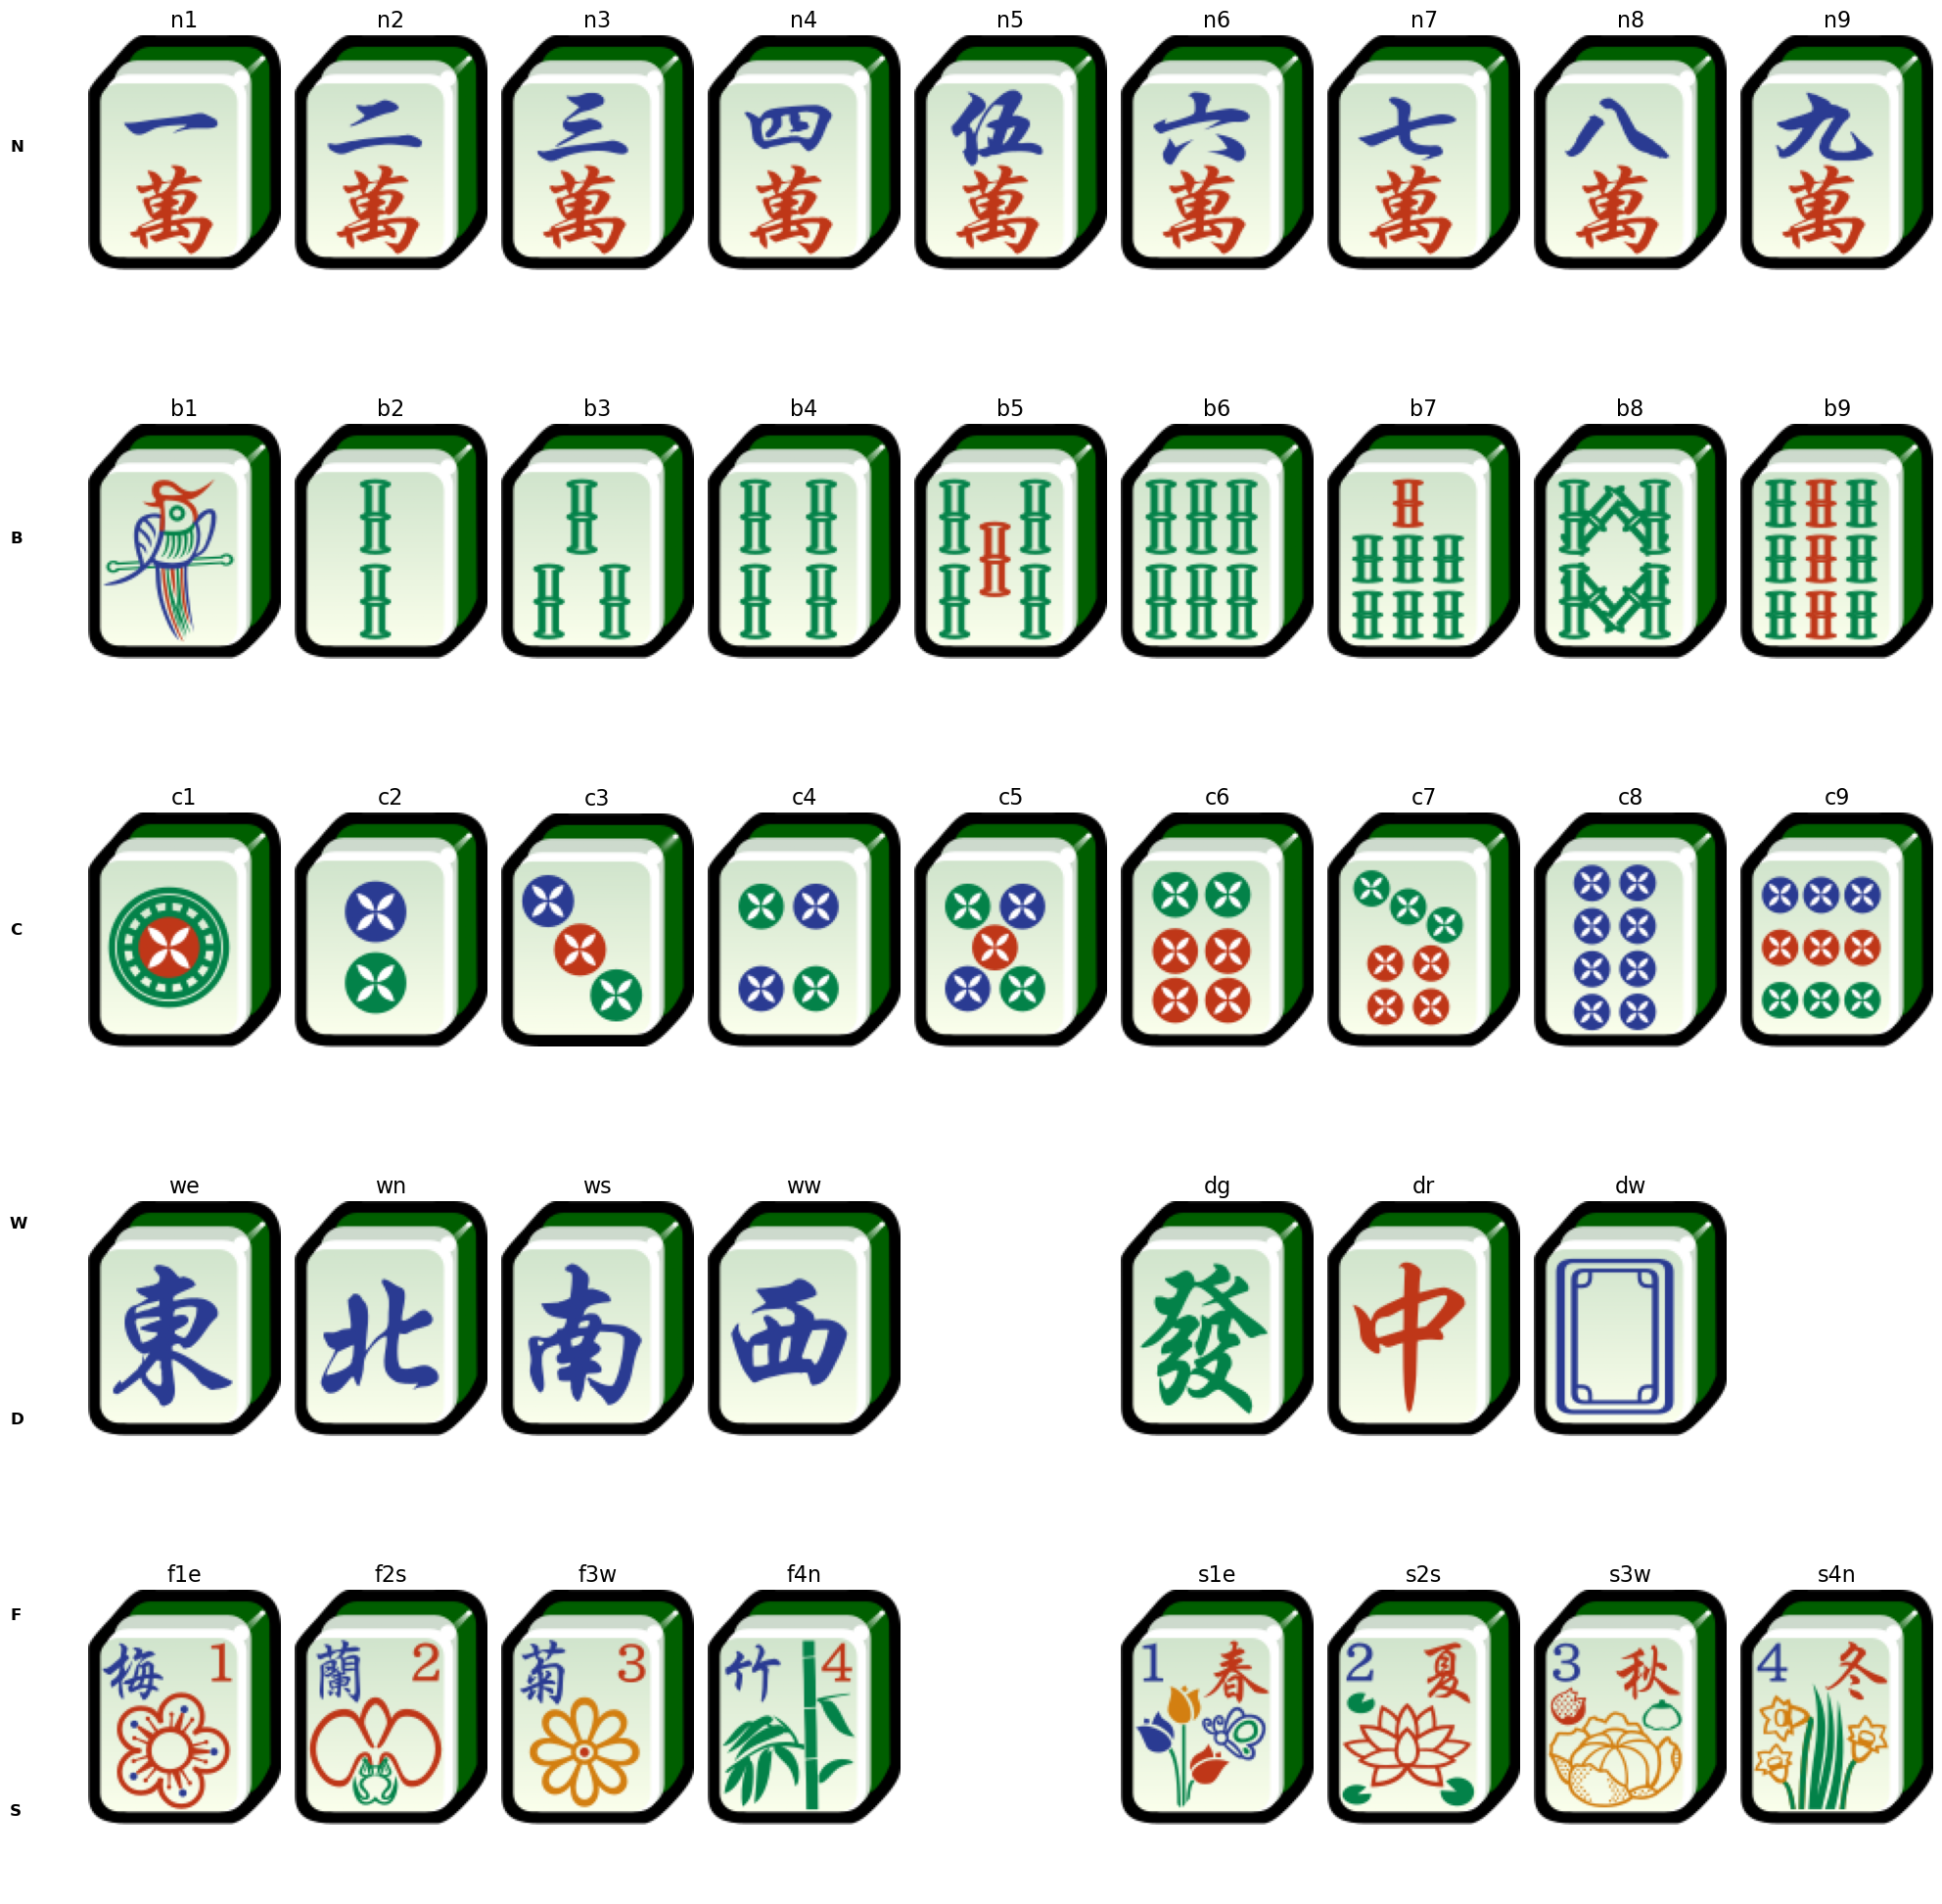

In [13]:
custom_order = ['N', 'B', 'C', ('W', 'D'), ('F', 'S')]

image_groups = defaultdict(list)
for image_file in image_files:
    starting_letter = image_file[0].upper()
    image_groups[starting_letter].append(image_file)

# Calculate the number of rows needed
num_rows = len(custom_order)
max_images_per_row = 9

# Create a figure
fig = plt.figure(figsize=(20, 4 * num_rows))

# Loop through each group (row) of images
for row, group in enumerate(custom_order):
    if isinstance(group, tuple):  # Combined row
        group1, group2 = group
        group_files1 = image_groups[group1][:max_images_per_row//2]
        group_files2 = image_groups[group2][:max_images_per_row//2]
        
        # First half of the row
        for col, image_file in enumerate(group_files1):
            plot_num = row * max_images_per_row + col + 1
            ax = fig.add_subplot(num_rows, max_images_per_row, plot_num)
            img = imread(os.path.join(folder_path, image_file))
            ax.imshow(img)
            ax.axis('off')
            ax.set_title(image_file[:-4], fontsize=16)
        
        # Add spacing
        middle_col = max_images_per_row // 2
        ax = fig.add_subplot(num_rows, max_images_per_row, row * max_images_per_row + middle_col + 1)
        ax.axis('off')
        
        # Second half of the row
        for col, image_file in enumerate(group_files2, start=middle_col+1):
            plot_num = row * max_images_per_row + col + 1
            ax = fig.add_subplot(num_rows, max_images_per_row, plot_num)
            img = imread(os.path.join(folder_path, image_file))
            ax.imshow(img)
            ax.axis('off')
            ax.set_title(image_file[:-4], fontsize=16)
        
        # Add row labels
        fig.text(0.01, 1 - (row + 0.25) / num_rows, f'{group1}', 
                 verticalalignment='center', fontsize=12, fontweight='bold')
        fig.text(0.01, 1 - (row + 0.75) / num_rows, f'{group2}', 
                 verticalalignment='center', fontsize=12, fontweight='bold')
    
    else:  # Single letter row
        group_files = image_groups[group][:max_images_per_row]
        for col, image_file in enumerate(group_files):
            plot_num = row * max_images_per_row + col + 1
            ax = fig.add_subplot(num_rows, max_images_per_row, plot_num)
            img = imread(os.path.join(folder_path, image_file))
            ax.imshow(img)
            ax.axis('off')
            ax.set_title(image_file[:-4], fontsize=16)
        
        # Add row label
        fig.text(0.01, 1 - (row + 0.5) / num_rows, f'{group}', 
                 verticalalignment='center', fontsize=12, fontweight='bold')

# Adjust the layout and display the plot
plt.tight_layout()
plt.subplots_adjust(left=0.05)  # Make room for row labels
plt.show()